# Google Colab Specific Setup

## For getting files on Google Drive and to Open in Colab

First download the files from the lab and uploade them to google drive near the top level. Then go to this folder in your browser and click on column of dots to the right of the *.ipynb file. Select "Open With". If "Google Collaboratory" appears choose it. If it does not appear go to the bottom of the list and choose "Connect more apps" and then install "Google Collaboratory". Close browser, reopen, and try again. Now "Google Collaboratory" should appear when you select "Open With". You should also just be able to double click on the *.ipynb file.

This cell links your Google drive to the Colab session

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Here, modify the path where you saved this notebook and the associated lab files on your Google drive. This can be obtained in colab

In [3]:
path = '/content/drive/MyDrive/SPE'

Check the path name is assigned correctly.

In [4]:
!echo $path
import os
os.path.isdir(path)

/content/drive/MyDrive/SPE


True

In [5]:
# This is needed so can import packages from a different path than standard libraries
import sys
sys.path.append(path)

Check the Python packages that are available by default in the Colab environment.

In [6]:
!pip list

Package                               Version
------------------------------------- -------------------
absl-py                               1.4.0
absolufy-imports                      0.3.1
accelerate                            1.10.1
aiofiles                              24.1.0
aiohappyeyeballs                      2.6.1
aiohttp                               3.12.15
aiosignal                             1.4.0
alabaster                             1.0.0
albucore                              0.0.24
albumentations                        2.0.8
ale-py                                0.11.2
altair                                5.5.0
annotated-types                       0.7.0
antlr4-python3-runtime                4.9.3
anyio                                 4.10.0
anywidget                             0.9.18
argon2-cffi                           25.1.0
argon2-cffi-bindings                  25.1.0
array_record                          0.8.1
arviz                                 0.22.0
astro

Need to install some python packages which is not present on Colab environement by default.

In [7]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.2/36.2 MB 49.5 MB/s eta 0:00:00


# Overview of Machine Learning and Polymer Informatics

Authors: Tianle Yue, Laboratory for Polymer Difital Engineering, University of Wisconsin–Madison.

This lab introduces students to an end-to-end example of applying a machine learning (ML) workflow to a polymer informatic dataset to address a research problem. The lab aims at deepening the conceptual understanding of ML, and while procedural skills such as writing Python code are not the focus of this lab, students will gain experience with a number of standard open source packages by interacting with code snippets through the Jupyter Notebook format and describing what each essential command does.

If you're unfamiliar with Jupyter Notebooks, take a moment to read about the lesson format.

## Jupyter Notebook Tips and Tricks

#### Cells
Each individual part of this notebook is known as a cell. The orange highlight bar along the left edge of this page indicates which cell is active.

#### Moving between active cells
You can move between cells by hitting the `up` and `down` arrows or by clicking on the cell you want to focus on. The `up` and `down` arrow keys will only move you between cells when you are not in edit mode.

#### Edit mode
Hit the `enter` key on the active cell to "enter" it and edit its contents. While in edit mode, the `up` and `down` arrow keys will not move you between cells. Double clicking a cell will also enable edit mode.

#### Running a cell
Hit `shift + enter` to run the active cell. In a code cell, the code will run and if there is output, it will be displayed immediately below the code cell. In a markdown cell, the markdown will be rendered. Running a cell will automatically make the following cell the new active cell.

####  Exit edit mode
If you're editing a cell and want to exit edit mode, hit the `esc` key. This will exit edit mode, but the current cell will still be the active cell. This action will not run the cell. It will enable you to use the `up` and `down` arrow keys to move between cells again.

#### Adding a cell
When you're not in edit mode, hit `b` to add a new cell. The new cell will be added directly below the active cell.

#### Deleting a cell
When you're not in edit mode, hit `x` to delete the active cell.

#### Switching between markdown and code
When you're not in edit mode, you can convert a code cell to a markdown cell by hitting the `m` key, and convert a markdown cell to a code cell by hitting the `c` key.

## Python Packages

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import train_test_split, cross_val_predict, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from math import sqrt

from tensorflow.keras.models import Sequential, save_model, load_model
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D, Dense, Flatten, Activation
import time
from sklearn.metrics import r2_score

from collections import Counter
import pickle
import pandas as pd
import collections
import seaborn as sns

from rdkit import rdBase
rdBase.DisableLog('rdApp.warning')

## Background

### Glass transition temperature

The glass-transition temperature $T_g$ of a material characterizes the range of temperatures over which this glass transition occurs (as an experimental definition, typically marked as 100 s of relaxation time). It is always lower than the melting temperature, $T_m$, of the crystalline state of the material, if one exists, because the glass is a higher energy state (or enthalpy at constant pressure) than the corresponding crystal.

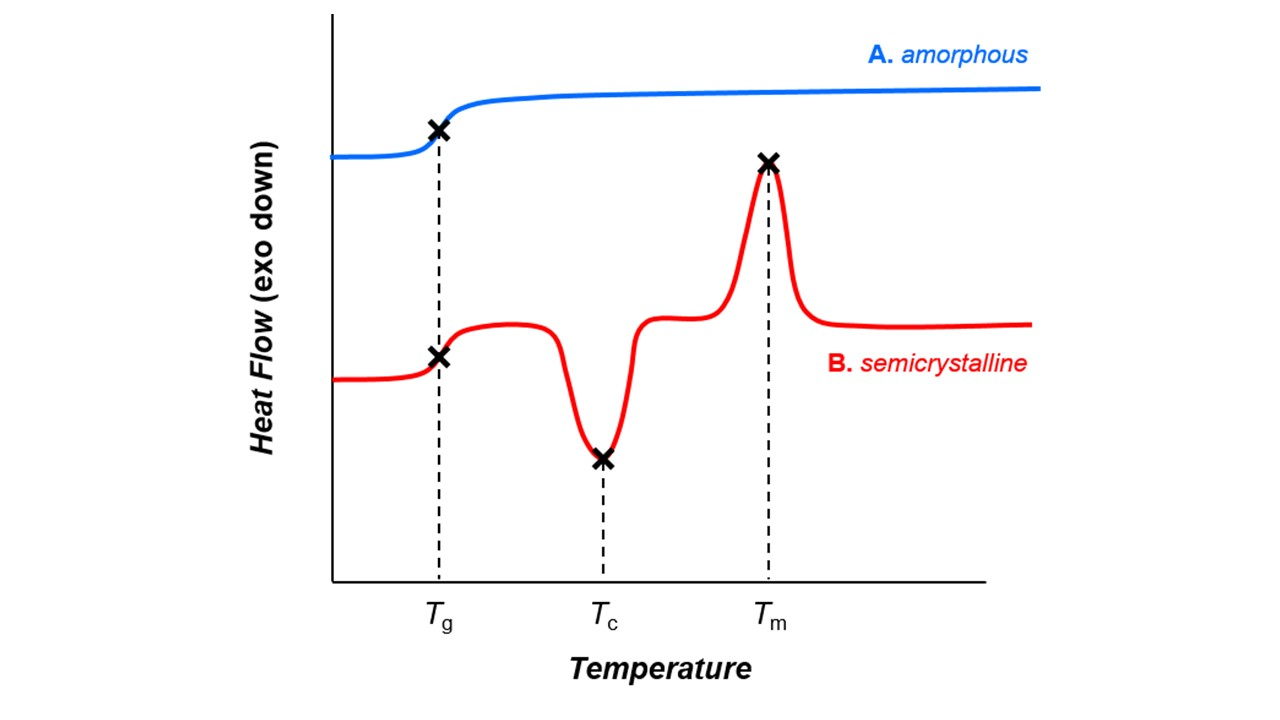

Typical Differential Scanning Calorimeter (DSC) heat flow for an amorphous and a semi-crystalline polymer (exothermic). With the help of DSC it is possible to determine thermal transitions of polymers in a range of temperatures between –180 and +600 °C.


### Glass transition temperature Dataset

The Glass transition temperature dataset used in this study was collected from the PolyInfo dataset (https://polymer.nims.go.jp/). Polymer Database "PoLyInfo" systematically provides various data required for polymeric material design. The main data source is academic literature on polymers. To access the PolyInfo dataset, the domain name of your email address must be registered in our management list.

The reason for using Tg as an example is twofold: first, this property is extremely important for polymer materials, and second, there are many samples available to train our network. This makes training the network less challenging, making it an excellent starting point for learning the integration of ML and polymer informatics.

## Data Inspection

Before getting started, let's first get to know the dataset we'll be working with a little. We'll be taking a look at what information is contained in each column, and how we can use that information to set ourselves up for success later when we start building our machine learning models.

### Importing the Dataset

Through out this lab, you will see many objects in the code named as _df, which stands for dataframe, the primary data structure from the pandas package. It is similar to a spreadsheet or a table.

We won't discuss dataframe operations in detail in this lab. However, external resources are available for you to familiarize yourself with dataframes such as this introduction and the pandas documentation.

In [9]:
# Read in the Tg data
Tg_df = pd.read_csv(os.path.join(path,"Tg.csv"))

In [10]:
# View the dataset (dataframe)
Tg_df

,Smiles,Tg(C)
0,*C*,-63.48
1,*C(C*)C,-2.73
2,*C(C*)CC,-22.54
3,*C(C*)CCC,-32.29
4,*C(C*)C(C)C,10.97
...,...,...
6901,*C1C(C(C(C1)(O)C(F)(F)F)(F)F)(C(C*)(F)F)F,152.00
6902,*C1C(CC(C1)CC(O)(C(F)(F)F)C(F)(F)F)(C(C*)(F)F)F,98.00
6903,*C1C(CC(C1)C(O)(C(F)(F)F)C(F)(F)F)(C(C*)(F)F)F,118.00
6904,*c1cc2C3(CCC(CC3)(C3=NC(CO3)c3ccccc3)C3=NC(CO3...,161.00


In [11]:
#sampled_Tg_df = Tg_df.sample(n=300, random_state=42)

Text(0, 0.5, 'Count')

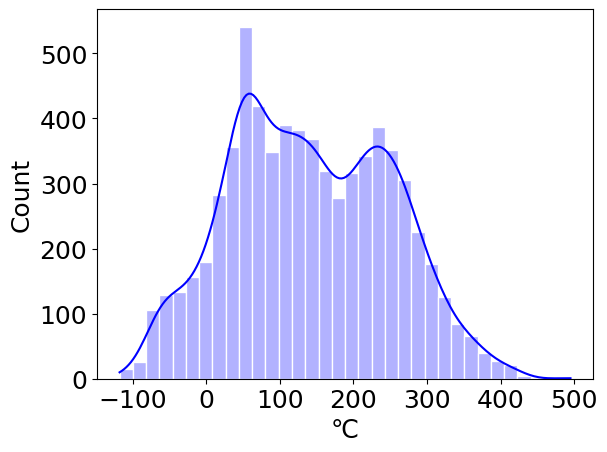

In [12]:
# View the distribution of dataset labels

kwargs = dict(hist_kws={'alpha':.3, 'edgecolor':'white'})
sns.histplot(Tg_df['Tg(C)'].dropna(), kde=True, color = 'blue', alpha = 0.3, edgecolor='white')

plt.xticks(size=18)
plt.yticks(size=18)
plt.xlabel("℃",fontsize=18)
plt.ylabel("Count",fontsize=18)

*C*


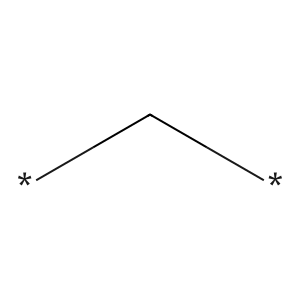

In [13]:
# View molecular structures in the dataset
smiles = Tg_df['Smiles'][0]
print(smiles)
molecule = Chem.MolFromSmiles(smiles)
Draw.MolToImage(molecule)

### Feature Engineering

The goal of feature engineering is to identify structural features that strongly correlate with the properties of the polymer. Feature engineering is the process of using domain knowledge to select, modify, or create new features from raw data—specifically, polymer structure representation—to increase the predictive power of machine learning algorithms.

#### Morgan fingerprint

Molecular fingerprints are a way to represent molecules as mathematical objects. By doing this, we can perform statistical analyses and/or ML techniques on the set of molecules. One of the most popular molecular fingerprinting methods is Extended Connectivity Fingerprinting (ECFP). The ECFP, commonly referred as the Morgan fingerprint, is named after its developer, Robert S. Morgan. These fingerprints are a type of circular feature used for molecular feature engineering method.

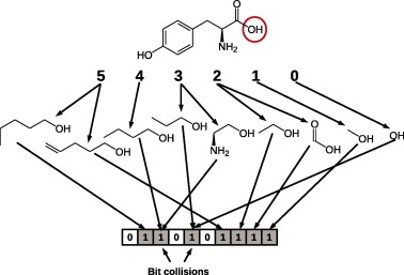

In [14]:
# Generation of Morgan fingerprint

fn = Tg_df.Smiles.apply(Chem.MolFromSmiles).apply(lambda m: AllChem.GetMorganFingerprintAsBitVect(m, radius=3, nBits=1024))

# Convert the Morgan fingerprints into a DataFrame with 1024 columns.
MF = pd.DataFrame()
columns = []
for i in range(1024):
    col_name = f'Bit_{i+1}'
    new_column = fn.apply(lambda x: int(bool(x.GetBit(i))))
    columns.append(pd.Series(new_column, name=col_name))
MF = pd.concat([MF] + columns, axis=1)
MF

,Bit_1,Bit_2,Bit_3,Bit_4,Bit_5,Bit_6,Bit_7,Bit_8,Bit_9,Bit_10,...,Bit_1015,Bit_1016,Bit_1017,Bit_1018,Bit_1019,Bit_1020,Bit_1021,Bit_1022,Bit_1023,Bit_1024
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6901,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6902,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6903,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6904,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


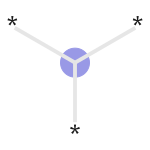

In [15]:
# View the substructure represented by each bit of the Morgan Fingerprint

# Select a specific bit
bit = 1

for i in range(6000):
    mol = Chem.MolFromSmiles(Tg_df.loc[i,'Smiles'])
    # Get the bit information of the Morgan fingerprint
    info={}
    fp = rdMolDescriptors.GetMorganFingerprintAsBitVect(mol, 3, nBits=1024, bitInfo=info)
    if bit in info:
        # Get the substructure represented by the bit
        submols = []
        for atom_idx, radius in info[bit]:
            if 1:
                env = Chem.FindAtomEnvironmentOfRadiusN(mol, radius, atom_idx)
                atoms = set(Chem.FindAtomEnvironmentOfRadiusN(mol, radius, atom_idx))
                submols.append(Chem.PathToSubmol(mol, env))

        for submol in submols:
            display(Draw.DrawMorganBit(mol,bit,info))

        break


The central atom of the substructures is highlighted in purple, aromatic atoms are highlighted in yellow, other atoms and bonds are highlighted in gray.

*C(C*)C


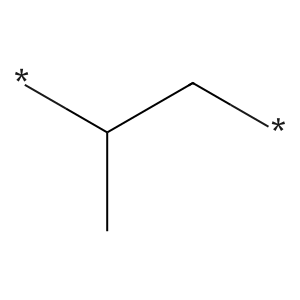

In [16]:
# View molecular structures in the dataset
smiles = Tg_df['Smiles'][1]
print(smiles)
molecule = Chem.MolFromSmiles(smiles)
Draw.MolToImage(molecule)

#### Morgan fingerprint with frequency

Morgan fingerprint with frequency not only identifies the presence of specific molecular features within the fingerprint but also encodes the frequency of these features, thereby enhancing the representation of polymer structures.

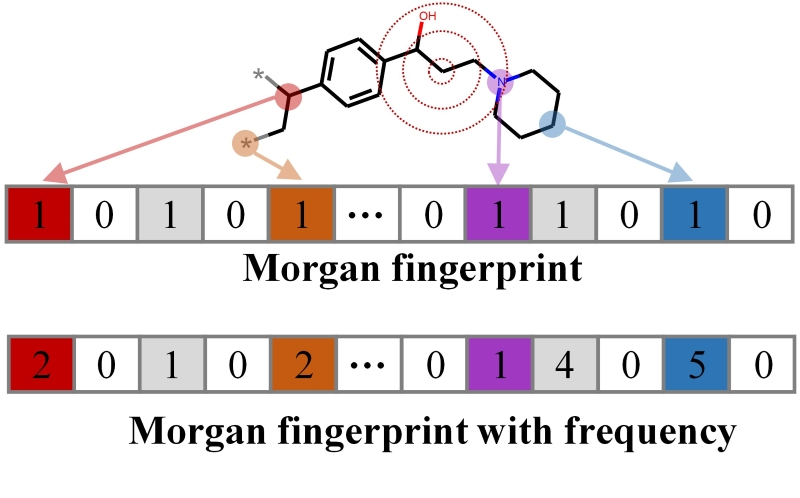

In [17]:
# Count all the substructure information

# Convert SMILES strings in 'Tg_df.Smiles' to RDKit molecule objects
molecules = Tg_df.Smiles.apply(Chem.MolFromSmiles)

# Generate Morgan fingerprints for each molecule with a radius of 3
fp = molecules.apply(lambda m: AllChem.GetMorganFingerprint(m, radius=3))

# Get the non-zero elements from the fingerprints (i.e., the bits that are set)
fp_n = fp.apply(lambda m: m.GetNonzeroElements())

# Initialize an empty list to store the hash codes (bit identifiers)
HashCode = []
for i in fp_n:
    for j in i.keys():
        HashCode.append(j)

# Get unique hash codes and convert them into a list
unique_set = set(HashCode)
unique_list = list(unique_set)

# Create a DataFrame to map unique hash codes to their indices
Corr_df = pd.DataFrame(unique_list).reset_index()

# Initialize an empty list to store the fingerprint vectors
MY_finger = []
for polymer in fp_n:
    my_finger = [0] * len(unique_list)
    for key in polymer.keys():
        index = Corr_df[Corr_df[0] == key]['index'].values[0]
        my_finger[index] = polymer[key]
    MY_finger.append(my_finger)

# Convert the list of fingerprint vectors into a DataFrame
MFF = pd.DataFrame(MY_finger)
MFF

,0,1,2,3,4,5,6,7,8,9,...,26281,26282,26283,26284,26285,26286,26287,26288,26289,26290
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6901,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6902,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6903,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6904,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# filter input into the most popular X substructures

# Count the number of zeros in each column of the DataFrame
Zero_Sum = (MFF == 0).astype(int).sum()

# Set a threshold for the number of zeros in a column
NumberOfZero =6870

# Print the number of columns with fewer zeros than the threshold
print(len(Zero_Sum[Zero_Sum < NumberOfZero]))

1210


In [19]:
# Generate the Morgan fingerprint with frequency after determining the number of dimensions

Columns = Zero_Sum[Zero_Sum < NumberOfZero].index
Substructure_list = list(polymer.keys())
MFF = MFF[Columns]
MFF

,15,36,127,142,169,205,210,240,243,259,...,26115,26117,26127,26137,26154,26162,26199,26215,26231,26286
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6901,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6902,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6903,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6904,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


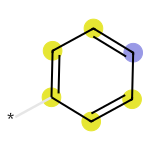

In [20]:
# View the substructure represented by each bit of the Morgan Fingerprint

# Select a specific bit
bit = 399

for i in range(6000):
    mol = Chem.MolFromSmiles(Tg_df.loc[i,'Smiles'])
    # Get the bit information of the Morgan fingerprint
    bi = {}
    fp = rdMolDescriptors.GetMorganFingerprint(mol, radius=3, bitInfo=bi)
    fp_n = fp.GetNonzeroElements()
    Code = (Corr_df[Corr_df['index'] == bit][0].values[0])
    if Code in fp_n.keys():
        img = Draw.DrawMorganBit(mol,Code,bi)

        break
img

The central atom of the substructures is highlighted in purple, aromatic atoms are highlighted in yellow, other atoms and bonds are highlighted in gray.

*C(C*)Cc1ccccc1


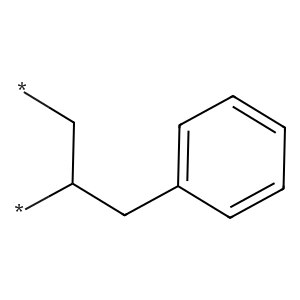

In [21]:
# View molecular structures in the dataset
smiles = Tg_df['Smiles'][21]
print(smiles)
molecule = Chem.MolFromSmiles(smiles)
Draw.MolToImage(molecule)

In [22]:
#Save the generated information for future reproduction of the same Morgan fingerprint with frequency.

pickle_out = open("Corr_All.pickle","wb")
pickle.dump(Corr_df, pickle_out)
pickle_out.close()

pickle_out = open("unique_list_All.pickle","wb")
pickle.dump(unique_list, pickle_out)
pickle_out.close()

pickle_out = open("polymer.keys_All.pickle","wb")
pickle.dump(Substructure_list, pickle_out)
pickle_out.close()

pickle_out = open("Columns_All.pickle","wb")
pickle.dump(Columns, pickle_out)
pickle_out.close()

#### Descriptors

Descriptors represent another popular method for feature representation in the fields of ML and polymer informatics. These are quantifiable attributes or features of a molecule that can be calculated using various chemical and physical properties. Descriptors provide a way to numerically represent the characteristics of molecules in a format that ML models can efficiently process.

In [23]:
def calculate_all_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        # Initialize a dictionary to store the calculated descriptors
        descriptors = {}
        for descriptor_name, descriptor_function in Descriptors.descList:
            try:
                descriptors[descriptor_name] = descriptor_function(mol)
            except:
                descriptors[descriptor_name] = None
        return descriptors
    else:
        return None

descriptors_df = Tg_df['Smiles'].apply(lambda x: calculate_all_descriptors(x))
descriptors_df = pd.DataFrame(descriptors_df.tolist())
descriptors_df

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,1.750000,1.750000,0.875000,0.875000,0.355446,20.000000,14.027,12.011,14.015650,6,...,0,0,0,0,0,0,0,0,0,0
1,2.395833,2.395833,0.750000,0.750000,0.414720,25.666667,42.081,36.033,42.046950,18,...,0,0,0,0,0,0,0,0,0,0
2,2.332824,2.332824,0.743056,0.743056,0.451401,22.250000,56.108,48.044,56.062600,24,...,0,0,0,0,0,0,0,0,0,0
3,2.310000,2.310000,0.734306,0.734306,0.476641,20.200000,70.135,60.055,70.078250,30,...,0,0,0,0,0,0,0,0,0,0
4,2.374491,2.374491,0.699074,0.699074,0.465496,21.400000,70.135,60.055,70.078250,30,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6901,14.230116,14.230116,1.115390,-5.853856,0.764710,44.411765,270.119,264.071,270.029091,100,...,0,0,0,0,0,0,0,0,0,0
6902,14.610956,14.610956,0.457778,-6.005614,0.762588,33.809524,330.190,319.102,330.066619,124,...,0,0,0,0,0,0,0,0,0,0
6903,14.547685,14.547685,0.782397,-6.107007,0.783068,34.900000,316.163,307.091,316.050969,118,...,0,0,0,0,0,0,0,0,0,0
6904,6.761067,6.761067,0.026076,-0.514062,0.096597,23.661538,855.179,792.683,854.481129,328,...,0,0,0,0,0,0,0,0,6,0


The specific meanings of the descriptors in the dataframe can be found at the following URL： https://www.rdkit.org/docs/Cartridge.html#descriptors

##### Remove constant columns

Columns that have a constant value for all data points have no information and can't possibly help the ML model learn anything.

In [24]:
# Remove Constant Columns
descriptors_df_noconstant = descriptors_df.loc[:, (descriptors_df != descriptors_df.iloc[0]).any()]
descriptors_df_noconstant = descriptors_df_noconstant.dropna(axis=1, how='any')
# report number of columns
len(descriptors_df_noconstant.columns)

194

##### Remove highly correlated features

Features that are extremely similar don't give any additional information beyond the first appearance.  
They can also confuse the model by giving very similar information that may essentially overload the model.  
Before we remove features, let's calculate the `correlation matrix` for all the features.

In [25]:
# Remove Highly correlated Features
# using notes here for methodology: https://chrisalbon.com/machine_learning/feature_selection/drop_highly_correlated_features/

descriptors_corr_df = descriptors_df_noconstant.corr(method="pearson").abs()

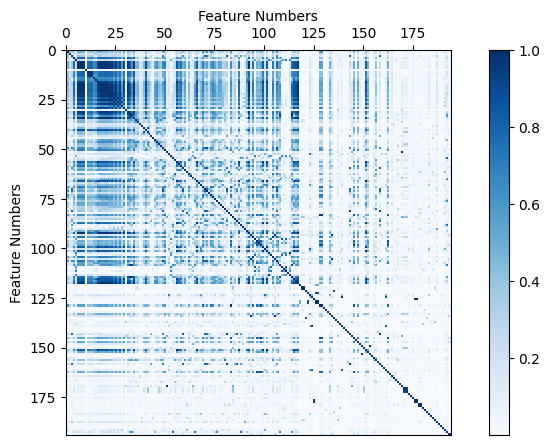

In [26]:
# before removing correlated features
fig1, ax1 = plt.subplots(figsize=(10,5))
c = ax1.pcolor(descriptors_corr_df,cmap="Blues")
ax1.set_ylim(ax1.get_ylim()[::-1])
ax1.xaxis.set_ticks_position('top')
ax1.xaxis.set_label_position('top')
ax1.set_xlabel('Feature Numbers')
ax1.set_ylabel('Feature Numbers')
ax1.set_aspect('equal')
plt.colorbar(c,ax=ax1)
plt.show()

In [27]:
# Filter the features with correlation coefficients above 0.95
upper = descriptors_corr_df.where(np.triu(np.ones(descriptors_corr_df.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
descriptors_df_lowcorr = descriptors_df_noconstant.drop(columns=to_drop)
# recalculate the correlation matrix so we can compare
descriptors_corr_df_update = descriptors_df_lowcorr.corr(method="pearson").abs()

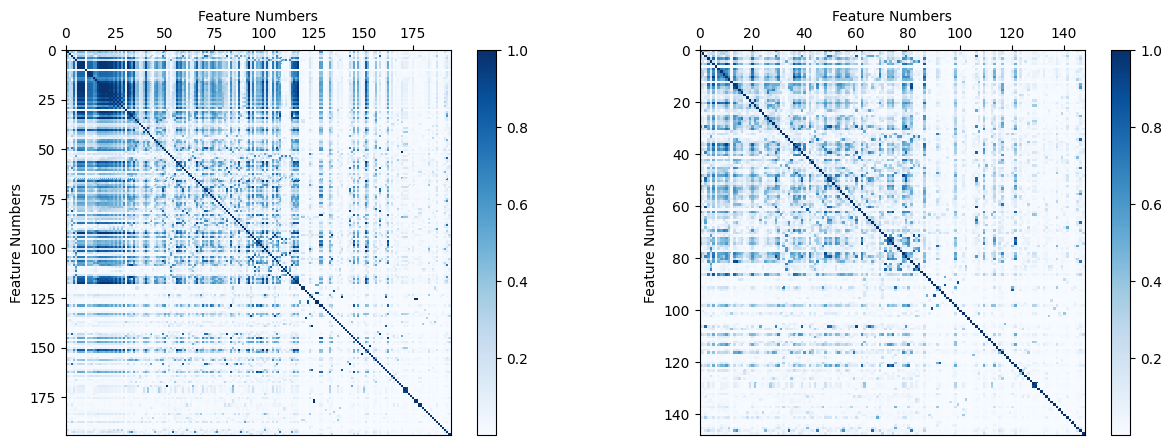

In [28]:
# plot correlation after removing highly correlated features

fig1, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
c1 = ax1.pcolor(descriptors_corr_df,cmap="Blues")
ax1.set_ylim(ax1.get_ylim()[::-1])
ax1.xaxis.set_ticks_position('top')
ax1.xaxis.set_label_position('top')
ax1.set_xlabel('Feature Numbers')
ax1.set_ylabel('Feature Numbers')
ax1.set_aspect('equal')

plt.colorbar(c1,ax=ax1)

c2 = ax2.pcolor(descriptors_corr_df_update,cmap="Blues")
ax2.set_ylim(ax2.get_ylim()[::-1])
ax2.xaxis.set_ticks_position('top')
ax2.xaxis.set_label_position('top')
ax2.set_xlabel('Feature Numbers')
ax2.set_ylabel('Feature Numbers')
ax2.set_aspect('equal')
plt.colorbar(c2,ax=ax2)
plt.show()

In [29]:
len(descriptors_df_lowcorr.columns)

148

##### Feature Normalization

Finally the last thing that we need to do is perform some normalization or rescaling of our features.

It should be fairly apparent that our features come in many shapes and sizes. Machine Learning algorithms can be very sensitive to these differences.
For example one feature may be several orders of magnitude larger in values and in range of values.
This can make some algorithms significantly biased towards those features so the best practice is usually to perform some alteration to make all the features look similar, while still preserving the information they contain

In our case we're going to linearly rescale the features so that they all have the same minimum and same maximum. If you're interested in checking of the details of how this is done you can check out the documentation for the Scikit-learn method we'll be using: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

In [30]:
descriptors_df_lowcorr

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,NumRadicalElectrons,FpDensityMorgan1,AvgIpc,BalabanJ,...,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea
0,1.750000,0.875000,0.875000,0.355446,20.000000,14.027,0,4.000000,0.918296,1.632993,...,0,0,0,0,0,0,0,0,0,0
1,2.395833,0.750000,0.750000,0.414720,25.666667,42.081,0,3.000000,1.378783,2.539539,...,0,0,0,0,0,0,0,0,0,0
2,2.332824,0.743056,0.743056,0.451401,22.250000,56.108,0,2.500000,1.650022,2.754185,...,0,0,0,0,0,0,0,0,0,0
3,2.310000,0.734306,0.734306,0.476641,20.200000,70.135,0,2.200000,1.679823,2.831820,...,0,0,0,0,0,0,0,0,0,0
4,2.374491,0.699074,0.699074,0.465496,21.400000,70.135,0,2.000000,1.645711,3.144208,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6901,14.230116,1.115390,-5.853856,0.764710,44.411765,270.119,0,1.235294,2.378449,3.484734,...,0,0,0,0,0,0,0,0,0,0
6902,14.610956,0.457778,-6.005614,0.762588,33.809524,330.190,0,1.095238,2.627781,3.075549,...,0,0,0,0,0,0,0,0,0,0
6903,14.547685,0.782397,-6.107007,0.783068,34.900000,316.163,0,1.100000,2.632632,3.299603,...,0,0,0,0,0,0,0,0,0,0
6904,6.761067,0.026076,-0.514062,0.096597,23.661538,855.179,0,0.476923,4.174353,0.989347,...,0,0,0,0,0,0,0,0,6,0


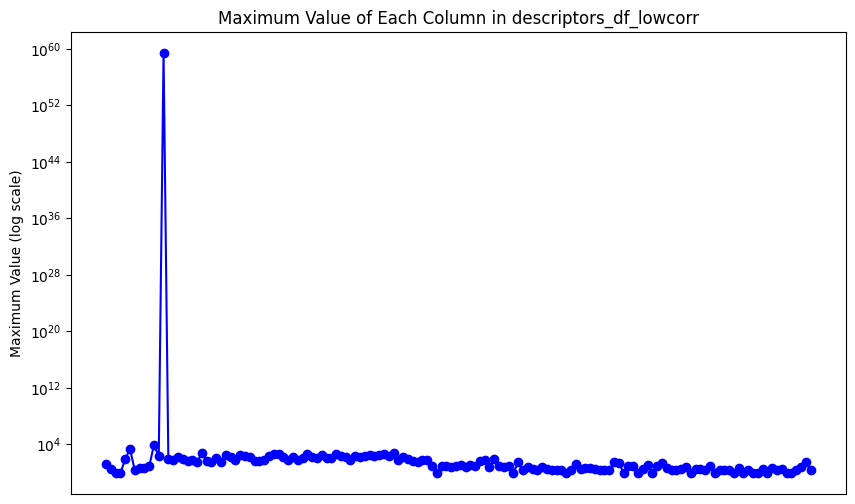

In [31]:
max_values = descriptors_df_lowcorr.max()

plt.figure(figsize=(10, 6))
plt.plot(max_values, marker='o', linestyle='-', color='b')
plt.yscale('log')

plt.title('Maximum Value of Each Column in descriptors_df_lowcorr')
plt.ylabel('Maximum Value (log scale)')

plt.xticks([])

plt.show()

In [32]:
minmax_descriptors = MinMaxScaler().fit_transform(descriptors_df_lowcorr)
minmax_descriptors_df = pd.DataFrame(minmax_descriptors,columns=descriptors_df_lowcorr.columns)

In [33]:
minmax_descriptors_df

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,NumRadicalElectrons,FpDensityMorgan1,AvgIpc,BalabanJ,...,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0.004263,0.255605,1.000000,0.386171,0.159898,0.000000,0.0,0.919831,0.061115,0.168029,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0
1,0.045281,0.219090,0.988061,0.452004,0.246651,0.012819,0.0,0.679325,0.182239,0.298480,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0
2,0.041279,0.217061,0.987397,0.492744,0.194344,0.019229,0.0,0.559072,0.253584,0.329368,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0
3,0.039829,0.214505,0.986562,0.520777,0.162960,0.025638,0.0,0.486920,0.261423,0.340539,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0
4,0.043925,0.204213,0.983197,0.508399,0.181331,0.025638,0.0,0.438819,0.252450,0.385492,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6901,0.796884,0.325828,0.357296,0.840723,0.533627,0.117020,0.0,0.254902,0.445186,0.434493,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0
6902,0.821072,0.133725,0.342801,0.838366,0.371313,0.144469,0.0,0.221218,0.510769,0.375612,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0
6903,0.817053,0.228554,0.333116,0.861113,0.388008,0.138059,0.0,0.222363,0.512045,0.407853,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0
6904,0.322520,0.007616,0.867324,0.098678,0.215954,0.384359,0.0,0.072509,0.917571,0.075409,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1875,0.0


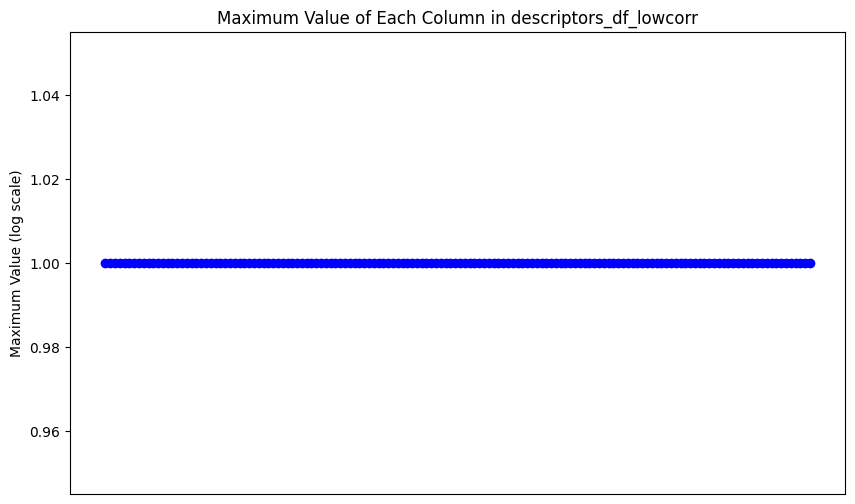

In [34]:
max_values = minmax_descriptors_df.max()

plt.figure(figsize=(10, 6))
plt.plot(max_values, marker='o', linestyle='-', color='b')


plt.title('Maximum Value of Each Column in descriptors_df_lowcorr')
plt.ylabel('Maximum Value (log scale)')

plt.xticks([])

plt.show()

# Using supervised learning to predict polymer peoperties

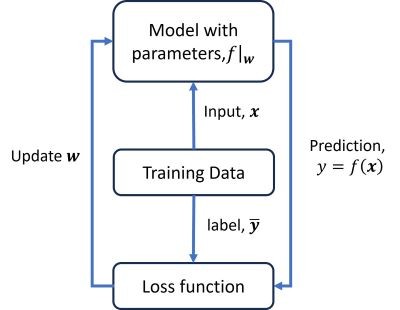

When using ML models to predict polymer properties, supervised learning is generally employed. In supervised learning, models are trained using pre-collected data. This training process relies on labeled data, where each data point is associated with a corresponding outcome. By training on this labeled dataset, a supervised ML model learns to map input data to expected outputs.

### Setpu Machine Learning Model

#### Establishing train/test split

Before jumping in to model building, we have one last thing to think about: How are we going to know how well our models are performing?

We can test the model by asking it to predict the $T_g$ value of materials, compare it with measured values, and calculate its prediction error using a range of error metrics (e.g. RMSE, R2, etc), but the naive approach of training and testing the model using the same dataset gives us a biased estimate of model error because the model has seen all the data we are asking it to predict already.

To get an unbiased estimate of model error, we can employ a simple cross-validation technique: Setting aside a subset of data as our test set, which the model won't access during the training process. The rest of the data constitutes the training set, which is used to train the model. This allows us to then evaluate model performance by comparing model prediction on both seen data (training set) and unseen data (test set).


We will first use the Morgan fingerprint as a feature engineering method as an example. First, we store our cleaned and normalized inputs and outputs in new variables `X` and `y` for easier understanding and manipulation.

#### Morgan fingerprint as feature engineering

In [35]:
X = MF
y = Tg_df['Tg(C)']

Then, we use the `train_test_split()` method from the `scikit-learn` package to generate the split. In this case, our input data `X` and output data `y` are split into 4 parts:    
- `X_train`: training set input data  
- `X_test`: test set input data  
- `y_train`: training set output data  
- `y_test`: test set output data  

In [36]:
# Generate train/test split by reserving 10% of data as test set

test_fraction = 0.1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_fraction, shuffle=True, random_state = 11)

The `random_state` parameter in the `train_test_split` function controls the randomness of the data splitting process. When you use `train_test_split` to divide your dataset into training and testing sets, the `shuffle=True` parameter indicates that the data will be randomly shuffled before splitting. This shuffling is done using a random number generator. `random_state` determines the initial seed for the random number generator. By setting a specific value for `random_state` (e.g., `random_state=11`), you ensure that the data is shuffled in the same way every time you run the code, leading to the same training and testing split. The main purpose of using `random_state` is to ensure the reproducibility of your code, especially when debugging, experimenting, or evaluating models. If you run the same code with the same `random_state` on different occasions or environments, you will consistently get the same training and testing datasets.

##### Fitting and Evaluating a Lasso

In statistics and machine learning, lasso (least absolute shrinkage and selection operator; also Lasso or LASSO) is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the resulting statistical model. The lasso method assumes that the coefficients of the linear model are sparse, meaning that few of them are non-zero.

In [37]:
from sklearn.linear_model import Lasso

# Create a Lasso model instance with a specified alpha parameter
# Alpha controls the strength of the regularization
# A higher alpha means stronger regularization and a simpler model
alpha_value = 1
lasso = Lasso(alpha=alpha_value)

# Train the Lasso model using the training data
lasso.fit(X_train, y_train)

Lasso(alpha=1)

In [38]:
# Calculate and print the R^2 score for the training set
y_pred_train = lasso.predict((X_train))
print("Train set R^2: ", r2_score(y_train, y_pred_train))
# Calculate and print the R^2 score for the test set
y_pred_test = lasso.predict((X_test))
print("Test set R^2: ", r2_score(y_test, y_pred_test))

Train set R^2:  0.7346571619684173
Test set R^2:  0.7230192626650318


Text(167.094, 466.416, 'Test  $R^2 =0.72$')

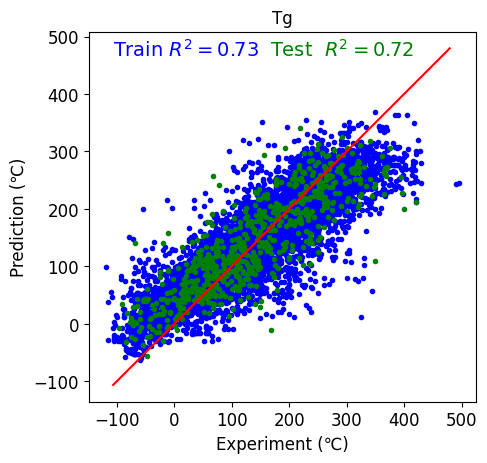

In [39]:
plt.figure(figsize=(5,5))

ax=plt.subplot(1, 1, 1)
# Plot the predicted vs. actual values for the training set in blue
plt.plot(y_train, y_pred_train, 'b.')
# Plot the predicted vs. actual values for the test set in green
plt.plot(y_test, y_pred_test, 'g.')
# Set the labels for the x-axis and y-axis
plt.xlabel("Experiment (℃)", fontsize=12)
plt.ylabel("Prediction (℃)", fontsize=12)
# Determine the range for the x-axis and y-axis based on the training data
x0, x1 = min(y_train), max(y_train)
length = 750
x_start, x_end = x0*0.9, x1*1.1
# Set the font size and weight for the x and y ticks
plt.xticks(fontsize=12, fontweight='normal')
plt.yticks(fontsize=12, fontweight='normal')
plt.title("Tg", fontsize=12, fontweight='normal')
plt.gca().set_aspect("equal", adjustable="box")
# Plot the unit line (a line with a slope of 1) in red
plt.plot(np.arange(x_start, x_end, (x_end - x_start) / 10),
np.arange(x_start, x_end, (x_end - x_start) / 10), 'r-')
# Add text annotations to display the R^2 scores for the training and test sets
plt.text(x_start + (x_end - x_start)*0, x_end - (x_end - x_start)*0.12, "Train $R^2={:.2f}$".format(r2_score(y_train, y_pred_train)),{'color':"b"}, fontsize=14)
plt.text(x_start + (x_end - x_start)*0.42, x_end - (x_end - x_start)*0.12, "Test  $R^2 ={:.2f}$".format(r2_score(y_test, y_pred_test)),{'color':"g"}, fontsize=14)

In [40]:
r2_data = {
    'Feature Engineering': 'Morgan Fingerprint',
    'Model': 'Lasso (alpha=1)',
    'Train R^2': [r2_score(y_train, y_pred_train)],
    'Test R^2': [r2_score(y_test, y_pred_test)]
}

# Convert the dictionary into a DataFrame
r2_df = pd.DataFrame(r2_data)

r2_df

,Feature Engineering,Model,Train R^2,Test R^2
0,Morgan Fingerprint,Lasso (alpha=1),0.734657,0.723019


Since the Lasso model has only one important hyperparameter, alpha, there is limited space for hyperparameter optimization. Additionally, training the model is computationally inexpensive. Therefore, this model is suitable for demonstrating grid search. In this case, we will set the range of alpha values from 10^-5 to 10, train the model for each alpha, and compute the resulting R^2 scores and plot how the R^2 score varies with alpha.

In [41]:
# Define the range of alpha values
alphas = np.logspace(-4, 1, 10)  # 10 points from 10^-5 to 10

# Initialize lists to store R^2 scores
r2_train_scores = []
r2_test_scores = []

# Iterate over alpha values
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)

    # Predict and compute R^2 scores for training and test sets
    y_pred_train = lasso.predict(X_train)
    y_pred_test = lasso.predict(X_test)

    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    r2_train_scores.append(r2_train)
    r2_test_scores.append(r2_test)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.360e+06, tolerance: 7.441e+03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.946e+06, tolerance: 7.441e+03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.803e+06, tolerance: 7.441e

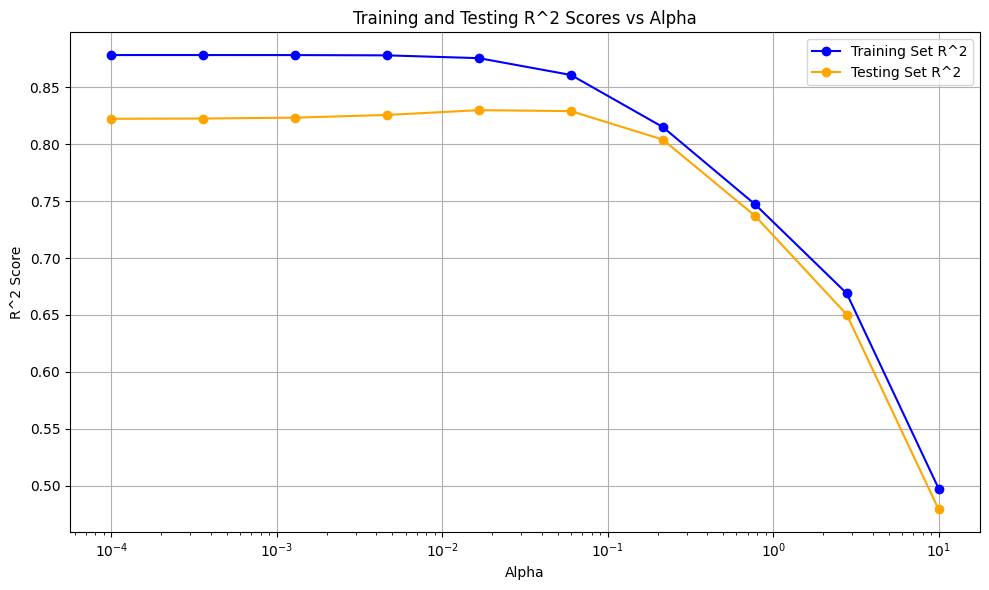

In [42]:
# Plotting the R^2 scores
plt.figure(figsize=(10, 6))

# Plot R^2 scores for both training and testing sets
plt.plot(alphas, r2_train_scores, marker='o', color='blue', label='Training Set R^2')
plt.plot(alphas, r2_test_scores, marker='o', color='orange', label='Testing Set R^2')

plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('R^2 Score')
plt.title('Training and Testing R^2 Scores vs Alpha')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

From the plot, we can see that although the training R^2 increases as alpha decreases, the testing R^2 starts to decline once alpha drops below approximately 0.02. This indicates that overfitting is occurring.

In [43]:
from sklearn.linear_model import Lasso

# Create a Lasso model instance with a specified alpha parameter
# Alpha controls the strength of the regularization
# A higher alpha means stronger regularization and a simpler model
alpha_value = 0.02
lasso = Lasso(alpha=alpha_value)

# Train the Lasso model using the training data
lasso.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.971e+04, tolerance: 7.441e+03
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.02)

In [44]:
# Calculate and print the R^2 score for the training set
y_pred_train = lasso.predict((X_train))
print("Train set R^2: ", r2_score(y_train, y_pred_train))
# Calculate and print the R^2 score for the test set
y_pred_test = lasso.predict((X_test))
print("Test set R^2: ", r2_score(y_test, y_pred_test))

Train set R^2:  0.8746857134268046
Test set R^2:  0.830295966905821


Text(167.094, 466.416, 'Test  $R^2 =0.83$')

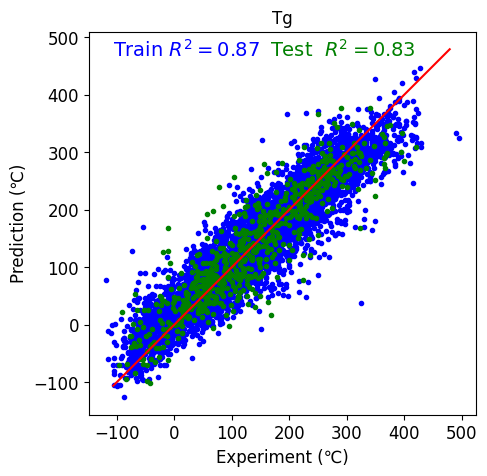

In [45]:
plt.figure(figsize=(5,5))

ax=plt.subplot(1, 1, 1)
# Plot the predicted vs. actual values for the training set in blue
plt.plot(y_train, y_pred_train, 'b.')
# Plot the predicted vs. actual values for the test set in green
plt.plot(y_test, y_pred_test, 'g.')
# Set the labels for the x-axis and y-axis
plt.xlabel("Experiment (℃)", fontsize=12)
plt.ylabel("Prediction (℃)", fontsize=12)
# Determine the range for the x-axis and y-axis based on the training data
x0, x1 = min(y_train), max(y_train)
length = 750
x_start, x_end = x0*0.9, x1*1.1
# Set the font size and weight for the x and y ticks
plt.xticks(fontsize=12, fontweight='normal')
plt.yticks(fontsize=12, fontweight='normal')
plt.title("Tg", fontsize=12, fontweight='normal')
plt.gca().set_aspect("equal", adjustable="box")
# Plot the unit line (a line with a slope of 1) in red
plt.plot(np.arange(x_start, x_end, (x_end - x_start) / 10),
np.arange(x_start, x_end, (x_end - x_start) / 10), 'r-')
# Add text annotations to display the R^2 scores for the training and test sets
plt.text(x_start + (x_end - x_start)*0, x_end - (x_end - x_start)*0.12, "Train $R^2={:.2f}$".format(r2_score(y_train, y_pred_train)),{'color':"b"}, fontsize=14)
plt.text(x_start + (x_end - x_start)*0.42, x_end - (x_end - x_start)*0.12, "Test  $R^2 ={:.2f}$".format(r2_score(y_test, y_pred_test)),{'color':"g"}, fontsize=14)

In [46]:
new_data = {
    'Feature Engineering': 'Morgan Fingerprint',
    'Model': 'Lasso (alpha=0.02)',
    'Train R^2': [r2_score(y_train, y_pred_train)],
    'Test R^2': [r2_score(y_test, y_pred_test)]
}

new_row_df  = pd.DataFrame(new_data)
r2_df = pd.concat([r2_df, new_row_df], ignore_index=True)
r2_df

,Feature Engineering,Model,Train R^2,Test R^2
0,Morgan Fingerprint,Lasso (alpha=1),0.734657,0.723019
1,Morgan Fingerprint,Lasso (alpha=0.02),0.874686,0.830296


##### Fitting and Evaluating a Random forests

Random forests or random decision forests is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. For classification tasks, the output of the random forest is the class selected by most trees. For regression tasks, the mean or average prediction of the individual trees is returned.

In [47]:
from sklearn.ensemble import RandomForestRegressor

# Create a RandomForestRegressor model instance
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the RandomForestRegressor model
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [48]:
# Calculate and print the R^2 score for the training set
y_pred_train = rf_regressor.predict((X_train))
print("Train set R^2: ", r2_score(y_train, y_pred_train))
# Calculate and print the R^2 score for the test set
y_pred_test = rf_regressor.predict((X_test))
print("Test set R^2: ", r2_score(y_test, y_pred_test))

Train set R^2:  0.982779754003236
Test set R^2:  0.8695474438090884


Text(167.094, 466.416, 'Test  $R^2 =0.87$')

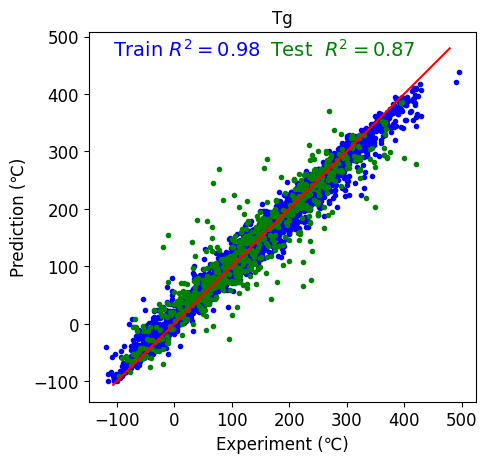

In [49]:
plt.figure(figsize=(5,5))

ax=plt.subplot(1, 1, 1)
# Plot the predicted vs. actual values for the training set in blue
plt.plot(y_train, y_pred_train, 'b.')
# Plot the predicted vs. actual values for the test set in green
plt.plot(y_test, y_pred_test, 'g.')
# Set the labels for the x-axis and y-axis
plt.xlabel("Experiment (℃)", fontsize=12)
plt.ylabel("Prediction (℃)", fontsize=12)
# Determine the range for the x-axis and y-axis based on the training data
x0, x1 = min(y_train), max(y_train)
length = 750
x_start, x_end = x0*0.9, x1*1.1
# Set the font size and weight for the x and y ticks
plt.xticks(fontsize=12, fontweight='normal')
plt.yticks(fontsize=12, fontweight='normal')
plt.title("Tg", fontsize=12, fontweight='normal')
plt.gca().set_aspect("equal", adjustable="box")
# Plot the unit line (a line with a slope of 1) in red
plt.plot(np.arange(x_start, x_end, (x_end - x_start) / 10),
np.arange(x_start, x_end, (x_end - x_start) / 10), 'r-')
# Add text annotations to display the R^2 scores for the training and test sets
plt.text(x_start + (x_end - x_start)*0, x_end - (x_end - x_start)*0.12, "Train $R^2={:.2f}$".format(r2_score(y_train, y_pred_train)),{'color':"b"}, fontsize=14)
plt.text(x_start + (x_end - x_start)*0.42, x_end - (x_end - x_start)*0.12, "Test  $R^2 ={:.2f}$".format(r2_score(y_test, y_pred_test)),{'color':"g"}, fontsize=14)

In [50]:
new_data = {
    'Feature Engineering': 'Morgan Fingerprint',
    'Model': 'RF',
    'Train R^2': [r2_score(y_train, y_pred_train)],
    'Test R^2': [r2_score(y_test, y_pred_test)]
}

new_row_df  = pd.DataFrame(new_data)
r2_df = pd.concat([r2_df, new_row_df], ignore_index=True)
r2_df

,Feature Engineering,Model,Train R^2,Test R^2
0,Morgan Fingerprint,Lasso (alpha=1),0.734657,0.723019
1,Morgan Fingerprint,Lasso (alpha=0.02),0.874686,0.830296
2,Morgan Fingerprint,RF,0.982780,0.869547


#### Fitting and Evaluating a Feedforward Neural Network

A feedforward neural network (FNN) is one of the two broad types of artificial neural network, characterized by direction of the flow of information between its layers. Its flow is uni-directional, meaning that the information in the model flows in only one direction—forward—from the input nodes, through the hidden nodes (if any) and to the output nodes, without any cycles or loops. Modern feedforward networks are trained using the backpropagation method.

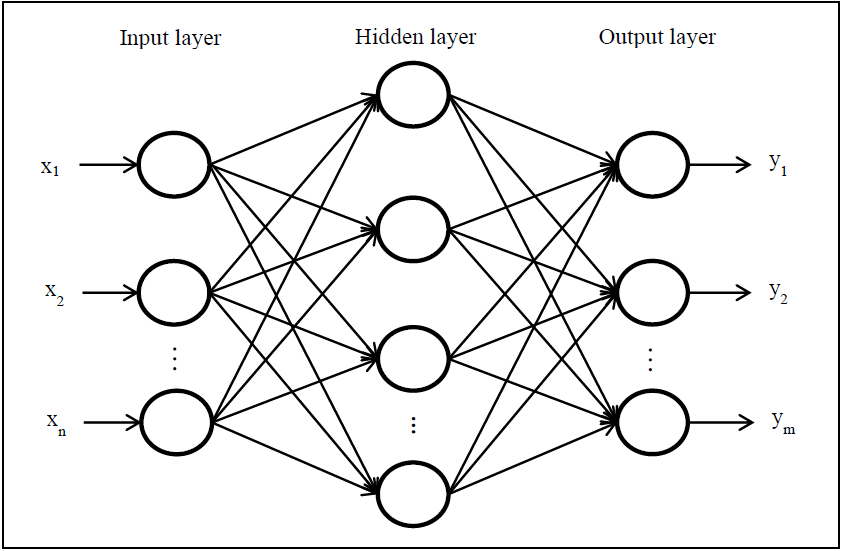

We will use an FNN network with four hidden layers.

In [51]:
# Set the number of neurons for the four hidden layers.
n_1=int(256)
n_2=int(64)
n_3=int(2048)
n_4=int(512)

In [52]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.utils import plot_model
from keras.layers import Concatenate
from numpy.random import seed
import tensorflow

In [53]:
# Define the input layer with a shape of 1024 features
A1 = Input(shape=([1024]),name='A1')
# Define the hidden layers
A2 = Dense(n_1, activation='relu',name='A2')(A1)
A3 = Dense(n_2, activation='relu',name='A3')(A2)
A4 = Dense(n_3, activation='relu',name='A4')(A3)
A5 = Dense(n_4, activation='relu',name='A5')(A4)
A6 = Dense(1, name='A6')(A5)
# Compile the model with Mean Squared Error (MSE) loss function and Adam optimizer
model = Model(inputs=[A1],outputs=[A6])
model.compile(loss = "mse", optimizer = 'adam')
# Set the random seed for reproducibility
seed(1)
tensorflow.random.set_seed(1*7+333)
# Train the model on the training data for 200 epochs with a batch size of 32
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data = ((X_test), y_test), verbose=0)

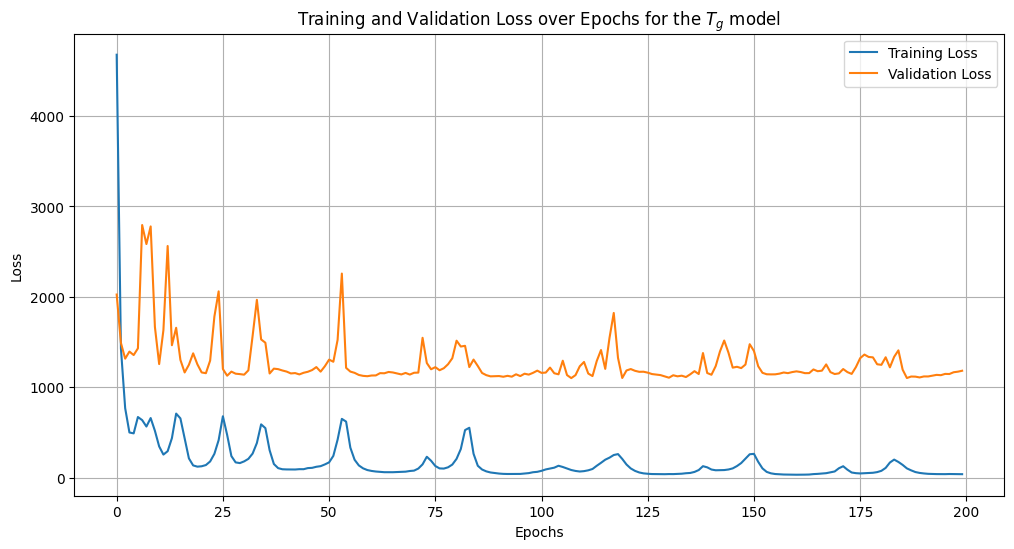

In [54]:
import matplotlib.pyplot as plt

# Extract loss values for training and validation sets
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting the loss curves
plt.figure(figsize=(12, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs for the $T_g$ model')
plt.legend()
plt.grid(True)
plt.show()

In [55]:
# Calculate and print the R^2 score for the training set
y_pred_train = model.predict((X_train))
print("Train set R^2: ", r2_score(y_train, y_pred_train))
# Calculate and print the R^2 score for the test set
y_pred_test = model.predict((X_test))
print("Test set R^2: ", r2_score(y_test, y_pred_test))

195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Train set R^2:  0.9894354991546335
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Test set R^2:  0.8956933310005687


Text(167.094, 466.416, 'Test  $R^2 =0.90$')

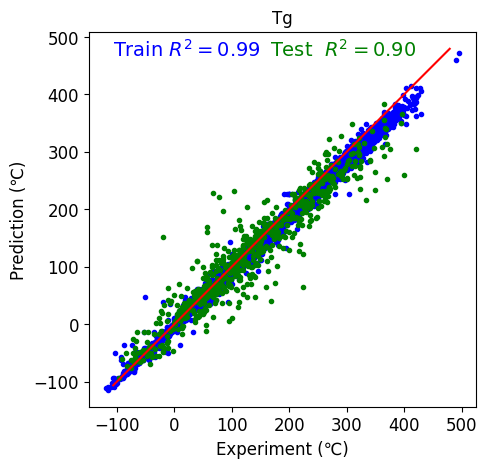

In [56]:
plt.figure(figsize=(5,5))

ax=plt.subplot(1, 1, 1)
# Plot the predicted vs. actual values for the training set in blue
plt.plot(y_train, y_pred_train, 'b.')
# Plot the predicted vs. actual values for the test set in green
plt.plot(y_test, y_pred_test, 'g.')
# Set the labels for the x-axis and y-axis
plt.xlabel("Experiment (℃)", fontsize=12)
plt.ylabel("Prediction (℃)", fontsize=12)
# Determine the range for the x-axis and y-axis based on the training data
x0, x1 = min(y_train), max(y_train)
length = 750
x_start, x_end = x0*0.9, x1*1.1
# Set the font size and weight for the x and y ticks
plt.xticks(fontsize=12, fontweight='normal')
plt.yticks(fontsize=12, fontweight='normal')
plt.title("Tg", fontsize=12, fontweight='normal')
plt.gca().set_aspect("equal", adjustable="box")
# Plot the unit line (a line with a slope of 1) in red
plt.plot(np.arange(x_start, x_end, (x_end - x_start) / 10),
np.arange(x_start, x_end, (x_end - x_start) / 10), 'r-')
# Add text annotations to display the R^2 scores for the training and test sets
plt.text(x_start + (x_end - x_start)*0, x_end - (x_end - x_start)*0.12, "Train $R^2={:.2f}$".format(r2_score(y_train, y_pred_train)),{'color':"b"}, fontsize=14)
plt.text(x_start + (x_end - x_start)*0.42, x_end - (x_end - x_start)*0.12, "Test  $R^2 ={:.2f}$".format(r2_score(y_test, y_pred_test)),{'color':"g"}, fontsize=14)

We can create a new dataframe to record the Feature Engineering methods we used, along with the Train R^2 and Test R^2 scores.

In [57]:
new_data = {
    'Feature Engineering': 'Morgan Fingerprint',
    'Model': 'FNN',
    'Train R^2': [r2_score(y_train, y_pred_train)],
    'Test R^2': [r2_score(y_test, y_pred_test)]
}

new_row_df  = pd.DataFrame(new_data)
r2_df = pd.concat([r2_df, new_row_df], ignore_index=True)
r2_df

,Feature Engineering,Model,Train R^2,Test R^2
0,Morgan Fingerprint,Lasso (alpha=1),0.734657,0.723019
1,Morgan Fingerprint,Lasso (alpha=0.02),0.874686,0.830296
2,Morgan Fingerprint,RF,0.982780,0.869547
3,Morgan Fingerprint,FNN,0.989435,0.895693


#### Morgan Fingerprint with Frequency as feature engineering method

Next, we will try using Morgan Fingerprint with Frequency as feature engineering method to observe how feature engineering impacts the results.

In [58]:
X = MFF
y = Tg_df['Tg(C)']

In [59]:
# Generate train/test split by reserving 10% of data as test set

test_fraction = 0.1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_fraction, shuffle=True, random_state = 11)

##### Fitting and Evaluating a Lasso

In statistics and machine learning, lasso (least absolute shrinkage and selection operator; also Lasso or LASSO) is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the resulting statistical model. The lasso method assumes that the coefficients of the linear model are sparse, meaning that few of them are non-zero.

In [60]:
from sklearn.linear_model import Lasso

# Create a Lasso model instance with a specified alpha parameter
# Alpha controls the strength of the regularization
# A higher alpha means stronger regularization and a simpler model
alpha_value = 1.0
lasso = Lasso(alpha=alpha_value)

# Train the Lasso model using the training data
lasso.fit(X_train, y_train)

Lasso()

In [61]:
# Calculate and print the R^2 score for the training set
y_pred_train = lasso.predict((X_train))
print("Train set R^2: ", r2_score(y_train, y_pred_train))
# Calculate and print the R^2 score for the test set
y_pred_test = lasso.predict((X_test))
print("Test set R^2: ", r2_score(y_test, y_pred_test))

Train set R^2:  0.7434752055889169
Test set R^2:  0.7506636777180679


Text(167.094, 466.416, 'Test  $R^2 =0.75$')

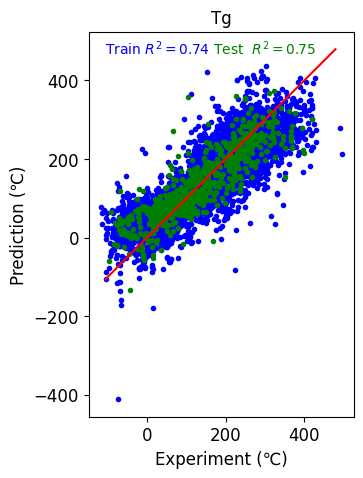

In [62]:
plt.figure(figsize=(5,5))

ax=plt.subplot(1, 1, 1)
# Plot the predicted vs. actual values for the training set in blue
plt.plot(y_train, y_pred_train, 'b.')
# Plot the predicted vs. actual values for the test set in green
plt.plot(y_test, y_pred_test, 'g.')
# Set the labels for the x-axis and y-axis
plt.xlabel("Experiment (℃)", fontsize=12)
plt.ylabel("Prediction (℃)", fontsize=12)
# Determine the range for the x-axis and y-axis based on the training data
x0, x1 = min(y_train), max(y_train)
length = 750
x_start, x_end = x0*0.9, x1*1.1
# Set the font size and weight for the x and y ticks
plt.xticks(fontsize=12, fontweight='normal')
plt.yticks(fontsize=12, fontweight='normal')
plt.title("Tg", fontsize=12, fontweight='normal')
plt.gca().set_aspect("equal", adjustable="box")
# Plot the unit line (a line with a slope of 1) in red
plt.plot(np.arange(x_start, x_end, (x_end - x_start) / 10),
np.arange(x_start, x_end, (x_end - x_start) / 10), 'r-')
# Add text annotations to display the R^2 scores for the training and test sets
plt.text(x_start + (x_end - x_start)*0, x_end - (x_end - x_start)*0.12, "Train $R^2={:.2f}$".format(r2_score(y_train, y_pred_train)),{'color':"b"}, fontsize=10)
plt.text(x_start + (x_end - x_start)*0.42, x_end - (x_end - x_start)*0.12, "Test  $R^2 ={:.2f}$".format(r2_score(y_test, y_pred_test)),{'color':"g"}, fontsize=10)

In [63]:
new_data = {
    'Feature Engineering': 'Morgan Fingerprint with Frequency',
    'Model': 'Lasso',
    'Train R^2': [r2_score(y_train, y_pred_train)],
    'Test R^2': [r2_score(y_test, y_pred_test)]
}

new_row_df  = pd.DataFrame(new_data)
r2_df = pd.concat([r2_df, new_row_df], ignore_index=True)
r2_df

,Feature Engineering,Model,Train R^2,Test R^2
0,Morgan Fingerprint,Lasso (alpha=1),0.734657,0.723019
1,Morgan Fingerprint,Lasso (alpha=0.02),0.874686,0.830296
2,Morgan Fingerprint,RF,0.982780,0.869547
3,Morgan Fingerprint,FNN,0.989435,0.895693
4,Morgan Fingerprint with Frequency,Lasso,0.743475,0.750664


##### Fitting and Evaluating a Random forests

Random forests or random decision forests is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. For classification tasks, the output of the random forest is the class selected by most trees. For regression tasks, the mean or average prediction of the individual trees is returned.

In [64]:
from sklearn.ensemble import RandomForestRegressor

# Create a RandomForestRegressor model instance
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the RandomForestRegressor model
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [65]:
# Calculate and print the R^2 score for the training set
y_pred_train = rf_regressor.predict((X_train))
print("Train set R^2: ", r2_score(y_train, y_pred_train))
# Calculate and print the R^2 score for the test set
y_pred_test = rf_regressor.predict((X_test))
print("Test set R^2: ", r2_score(y_test, y_pred_test))

Train set R^2:  0.9855584259871911
Test set R^2:  0.8947326644077429


Text(167.094, 466.416, 'Test  $R^2 =0.89$')

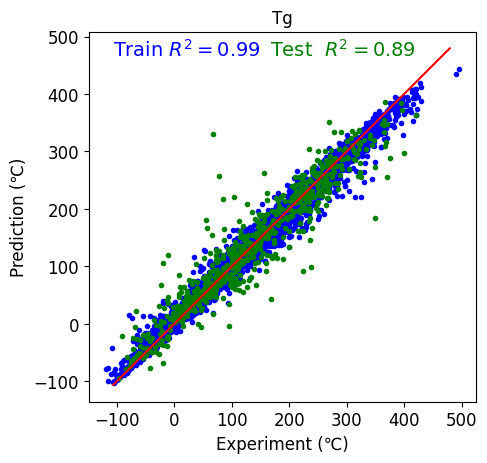

In [66]:
plt.figure(figsize=(5,5))

ax=plt.subplot(1, 1, 1)
# Plot the predicted vs. actual values for the training set in blue
plt.plot(y_train, y_pred_train, 'b.')
# Plot the predicted vs. actual values for the test set in green
plt.plot(y_test, y_pred_test, 'g.')
# Set the labels for the x-axis and y-axis
plt.xlabel("Experiment (℃)", fontsize=12)
plt.ylabel("Prediction (℃)", fontsize=12)
# Determine the range for the x-axis and y-axis based on the training data
x0, x1 = min(y_train), max(y_train)
length = 750
x_start, x_end = x0*0.9, x1*1.1
# Set the font size and weight for the x and y ticks
plt.xticks(fontsize=12, fontweight='normal')
plt.yticks(fontsize=12, fontweight='normal')
plt.title("Tg", fontsize=12, fontweight='normal')
plt.gca().set_aspect("equal", adjustable="box")
# Plot the unit line (a line with a slope of 1) in red
plt.plot(np.arange(x_start, x_end, (x_end - x_start) / 10),
np.arange(x_start, x_end, (x_end - x_start) / 10), 'r-')
# Add text annotations to display the R^2 scores for the training and test sets
plt.text(x_start + (x_end - x_start)*0, x_end - (x_end - x_start)*0.12, "Train $R^2={:.2f}$".format(r2_score(y_train, y_pred_train)),{'color':"b"}, fontsize=14)
plt.text(x_start + (x_end - x_start)*0.42, x_end - (x_end - x_start)*0.12, "Test  $R^2 ={:.2f}$".format(r2_score(y_test, y_pred_test)),{'color':"g"}, fontsize=14)

In [67]:
new_data = {
    'Feature Engineering': 'Morgan Fingerprint with Frequency',
    'Model': 'RF',
    'Train R^2': [r2_score(y_train, y_pred_train)],
    'Test R^2': [r2_score(y_test, y_pred_test)]
}

new_row_df  = pd.DataFrame(new_data)
r2_df = pd.concat([r2_df, new_row_df], ignore_index=True)
r2_df

,Feature Engineering,Model,Train R^2,Test R^2
0,Morgan Fingerprint,Lasso (alpha=1),0.734657,0.723019
1,Morgan Fingerprint,Lasso (alpha=0.02),0.874686,0.830296
2,Morgan Fingerprint,RF,0.982780,0.869547
3,Morgan Fingerprint,FNN,0.989435,0.895693
4,Morgan Fingerprint with Frequency,Lasso,0.743475,0.750664
5,Morgan Fingerprint with Frequency,RF,0.985558,0.894733


##### Fitting and Evaluating an FNN

In [68]:
A1 = Input(shape=([1210]),name='A1')
A2 = Dense(n_1, activation='relu',name='A2')(A1)
A3 = Dense(n_2, activation='relu',name='A3')(A2)
A4 = Dense(n_3, activation='relu',name='A4')(A3)
A5 = Dense(n_4, activation='relu',name='A5')(A4)
A6 = Dense(1, name='A6')(A5)

model = Model(inputs=[A1],outputs=[A6])
model.compile(loss = "mse", optimizer = 'adam')

seed(1)
tensorflow.random.set_seed(1*7+333)

history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data = ((X_test), y_test), verbose=0)

In [69]:
y_pred_train = model.predict((X_train))
print("Train set R^2: ", r2_score(y_train, y_pred_train))

y_pred_test = model.predict((X_test))
print("Test set R^2: ", r2_score(y_test, y_pred_test))

195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Train set R^2:  0.9922211717991553
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Test set R^2:  0.8803026984676574


Text(167.094, 466.416, 'Test  $R^2 =0.88$')

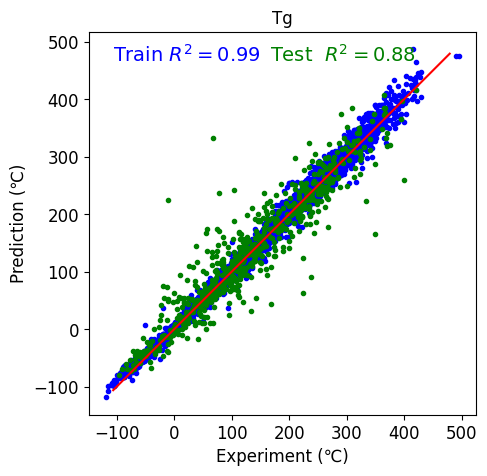

In [70]:
plt.figure(figsize=(5,5))

ax=plt.subplot(1, 1, 1)
plt.plot(y_train, y_pred_train, 'b.')
plt.plot(y_test, y_pred_test, 'g.')

plt.xlabel("Experiment (℃)", fontsize=12)
plt.ylabel("Prediction (℃)", fontsize=12)
x0, x1 = min(y_train), max(y_train)
length = 750
x_start, x_end = x0*0.9, x1*1.1
plt.xticks(fontsize=12, fontweight='normal')
plt.yticks(fontsize=12, fontweight='normal')
plt.title("Tg", fontsize=12, fontweight='normal')
plt.gca().set_aspect("equal", adjustable="box")
# the unit line
plt.plot(np.arange(x_start, x_end, (x_end - x_start) / 10),
np.arange(x_start, x_end, (x_end - x_start) / 10), 'r-')
plt.text(x_start + (x_end - x_start)*0, x_end - (x_end - x_start)*0.12, "Train $R^2={:.2f}$".format(r2_score(y_train, y_pred_train)),{'color':"b"}, fontsize=14)
plt.text(x_start + (x_end - x_start)*0.42, x_end - (x_end - x_start)*0.12, "Test  $R^2 ={:.2f}$".format(r2_score(y_test, y_pred_test)),{'color':"g"}, fontsize=14)

In [71]:
new_data = {
    'Feature Engineering': 'Morgan Fingerprint with Frequency',
    'Model': 'FNN',
    'Train R^2': [r2_score(y_train, y_pred_train)],
    'Test R^2': [r2_score(y_test, y_pred_test)]
}
new_row_df  = pd.DataFrame(new_data)
r2_df = pd.concat([r2_df, new_row_df], ignore_index=True)
r2_df

,Feature Engineering,Model,Train R^2,Test R^2
0,Morgan Fingerprint,Lasso (alpha=1),0.734657,0.723019
1,Morgan Fingerprint,Lasso (alpha=0.02),0.874686,0.830296
2,Morgan Fingerprint,RF,0.982780,0.869547
3,Morgan Fingerprint,FNN,0.989435,0.895693
4,Morgan Fingerprint with Frequency,Lasso,0.743475,0.750664
5,Morgan Fingerprint with Frequency,RF,0.985558,0.894733
6,Morgan Fingerprint with Frequency,FNN,0.992221,0.880303


#### Descriptors as feature engineering method

Next, we will try using Descriptors as feature engineering method to observe how feature engineering impacts the results.

In [72]:
X = minmax_descriptors_df
y = Tg_df['Tg(C)']

In [73]:
# Generate train/test split by reserving 10% of data as test set

test_fraction = 0.1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_fraction, shuffle=True, random_state = 11)

##### Fitting and Evaluating a Lasso

In statistics and machine learning, lasso (least absolute shrinkage and selection operator; also Lasso or LASSO) is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the resulting statistical model. The lasso method assumes that the coefficients of the linear model are sparse, meaning that few of them are non-zero.

In [74]:
from sklearn.linear_model import Lasso

# Create a Lasso model instance with a specified alpha parameter
# Alpha controls the strength of the regularization
# A higher alpha means stronger regularization and a simpler model
alpha_value = 1.0
lasso = Lasso(alpha=alpha_value)

# Train the Lasso model using the training data
lasso.fit(X_train, y_train)

Lasso()

In [75]:
# Calculate and print the R^2 score for the training set
y_pred_train = lasso.predict((X_train))
print("Train set R^2: ", r2_score(y_train, y_pred_train))
# Calculate and print the R^2 score for the test set
y_pred_test = lasso.predict((X_test))
print("Test set R^2: ", r2_score(y_test, y_pred_test))

Train set R^2:  0.6591796331953056
Test set R^2:  0.6563258823849305


Text(167.094, 466.416, 'Test  $R^2 =0.66$')

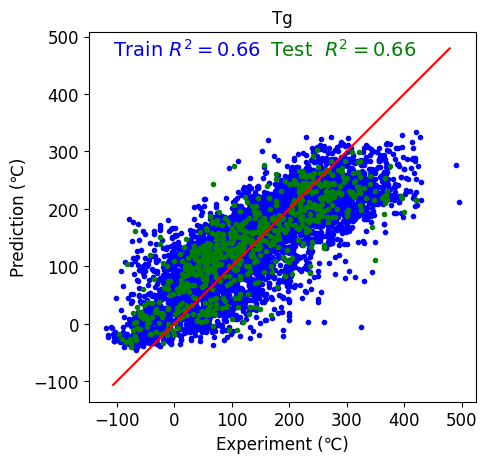

In [76]:
plt.figure(figsize=(5,5))

ax=plt.subplot(1, 1, 1)
# Plot the predicted vs. actual values for the training set in blue
plt.plot(y_train, y_pred_train, 'b.')
# Plot the predicted vs. actual values for the test set in green
plt.plot(y_test, y_pred_test, 'g.')
# Set the labels for the x-axis and y-axis
plt.xlabel("Experiment (℃)", fontsize=12)
plt.ylabel("Prediction (℃)", fontsize=12)
# Determine the range for the x-axis and y-axis based on the training data
x0, x1 = min(y_train), max(y_train)
length = 750
x_start, x_end = x0*0.9, x1*1.1
# Set the font size and weight for the x and y ticks
plt.xticks(fontsize=12, fontweight='normal')
plt.yticks(fontsize=12, fontweight='normal')
plt.title("Tg", fontsize=12, fontweight='normal')
plt.gca().set_aspect("equal", adjustable="box")
# Plot the unit line (a line with a slope of 1) in red
plt.plot(np.arange(x_start, x_end, (x_end - x_start) / 10),
np.arange(x_start, x_end, (x_end - x_start) / 10), 'r-')
# Add text annotations to display the R^2 scores for the training and test sets
plt.text(x_start + (x_end - x_start)*0, x_end - (x_end - x_start)*0.12, "Train $R^2={:.2f}$".format(r2_score(y_train, y_pred_train)),{'color':"b"}, fontsize=14)
plt.text(x_start + (x_end - x_start)*0.42, x_end - (x_end - x_start)*0.12, "Test  $R^2 ={:.2f}$".format(r2_score(y_test, y_pred_test)),{'color':"g"}, fontsize=14)

In [77]:
new_data = {
    'Feature Engineering': 'Descriptors',
    'Model': 'Lasso',
    'Train R^2': [r2_score(y_train, y_pred_train)],
    'Test R^2': [r2_score(y_test, y_pred_test)]
}

new_row_df  = pd.DataFrame(new_data)
r2_df = pd.concat([r2_df, new_row_df], ignore_index=True)
r2_df

,Feature Engineering,Model,Train R^2,Test R^2
0,Morgan Fingerprint,Lasso (alpha=1),0.734657,0.723019
1,Morgan Fingerprint,Lasso (alpha=0.02),0.874686,0.830296
2,Morgan Fingerprint,RF,0.982780,0.869547
3,Morgan Fingerprint,FNN,0.989435,0.895693
4,Morgan Fingerprint with Frequency,Lasso,0.743475,0.750664
5,Morgan Fingerprint with Frequency,RF,0.985558,0.894733
6,Morgan Fingerprint with Frequency,FNN,0.992221,0.880303
7,Descriptors,Lasso,0.659180,0.656326


##### Fitting and Evaluating a Random forests

Random forests or random decision forests is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. For classification tasks, the output of the random forest is the class selected by most trees. For regression tasks, the mean or average prediction of the individual trees is returned.

In [78]:
from sklearn.ensemble import RandomForestRegressor

# Create a RandomForestRegressor model instance
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the RandomForestRegressor model
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [79]:
# Calculate and print the R^2 score for the training set
y_pred_train = rf_regressor.predict((X_train))
print("Train set R^2: ", r2_score(y_train, y_pred_train))
# Calculate and print the R^2 score for the test set
y_pred_test = rf_regressor.predict((X_test))
print("Test set R^2: ", r2_score(y_test, y_pred_test))

Train set R^2:  0.9819805360109993
Test set R^2:  0.8774311211648367


Text(167.094, 466.416, 'Test  $R^2 =0.88$')

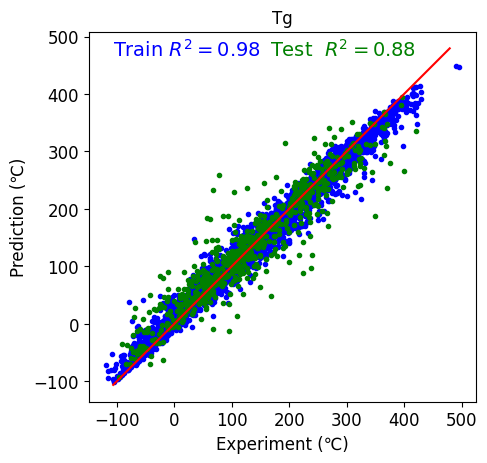

In [80]:
plt.figure(figsize=(5,5))

ax=plt.subplot(1, 1, 1)
# Plot the predicted vs. actual values for the training set in blue
plt.plot(y_train, y_pred_train, 'b.')
# Plot the predicted vs. actual values for the test set in green
plt.plot(y_test, y_pred_test, 'g.')
# Set the labels for the x-axis and y-axis
plt.xlabel("Experiment (℃)", fontsize=12)
plt.ylabel("Prediction (℃)", fontsize=12)
# Determine the range for the x-axis and y-axis based on the training data
x0, x1 = min(y_train), max(y_train)
length = 750
x_start, x_end = x0*0.9, x1*1.1
# Set the font size and weight for the x and y ticks
plt.xticks(fontsize=12, fontweight='normal')
plt.yticks(fontsize=12, fontweight='normal')
plt.title("Tg", fontsize=12, fontweight='normal')
plt.gca().set_aspect("equal", adjustable="box")
# Plot the unit line (a line with a slope of 1) in red
plt.plot(np.arange(x_start, x_end, (x_end - x_start) / 10),
np.arange(x_start, x_end, (x_end - x_start) / 10), 'r-')
# Add text annotations to display the R^2 scores for the training and test sets
plt.text(x_start + (x_end - x_start)*0, x_end - (x_end - x_start)*0.12, "Train $R^2={:.2f}$".format(r2_score(y_train, y_pred_train)),{'color':"b"}, fontsize=14)
plt.text(x_start + (x_end - x_start)*0.42, x_end - (x_end - x_start)*0.12, "Test  $R^2 ={:.2f}$".format(r2_score(y_test, y_pred_test)),{'color':"g"}, fontsize=14)

In [81]:
new_data = {
    'Feature Engineering': 'Descriptors',
    'Model': 'RF',
    'Train R^2': [r2_score(y_train, y_pred_train)],
    'Test R^2': [r2_score(y_test, y_pred_test)]
}

new_row_df  = pd.DataFrame(new_data)
r2_df = pd.concat([r2_df, new_row_df], ignore_index=True)
r2_df

,Feature Engineering,Model,Train R^2,Test R^2
0,Morgan Fingerprint,Lasso (alpha=1),0.734657,0.723019
1,Morgan Fingerprint,Lasso (alpha=0.02),0.874686,0.830296
2,Morgan Fingerprint,RF,0.982780,0.869547
3,Morgan Fingerprint,FNN,0.989435,0.895693
4,Morgan Fingerprint with Frequency,Lasso,0.743475,0.750664
5,Morgan Fingerprint with Frequency,RF,0.985558,0.894733
6,Morgan Fingerprint with Frequency,FNN,0.992221,0.880303
7,Descriptors,Lasso,0.659180,0.656326
8,Descriptors,RF,0.981981,0.877431


##### Fitting and Evaluating an FNN

In [82]:
A1 = Input(shape=([148]),name='A1')
A2 = Dense(n_1, activation='relu',name='A2')(A1)
A3 = Dense(n_2, activation='relu',name='A3')(A2)
A4 = Dense(n_3, activation='relu',name='A4')(A3)
A5 = Dense(n_4, activation='relu',name='A5')(A4)
A6 = Dense(1, name='A6')(A5)

model = Model(inputs=[A1],outputs=[A6])
model.compile(loss = "mse", optimizer = 'adam')

seed(1)
tensorflow.random.set_seed(1*7+333)

history = model.fit(X_train, y_train, epochs=200, batch_size=4, validation_data = ((X_test), y_test), verbose=0)

In [83]:
y_pred_train = model.predict((X_train))
print("Train set R^2: ", r2_score(y_train, y_pred_train))

y_pred_test = model.predict((X_test))
print("Test set R^2: ", r2_score(y_test, y_pred_test))

195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Train set R^2:  0.9602024653389005
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Test set R^2:  0.882060148613311


Text(167.094, 466.416, 'Test  $R^2 =0.88$')

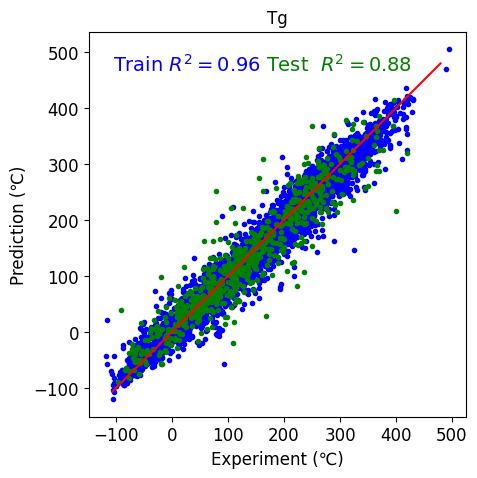

In [84]:
plt.figure(figsize=(5,5))

ax=plt.subplot(1, 1, 1)
plt.plot(y_train, y_pred_train, 'b.')
plt.plot(y_test, y_pred_test, 'g.')

plt.xlabel("Experiment (℃)", fontsize=12)
plt.ylabel("Prediction (℃)", fontsize=12)
x0, x1 = min(y_train), max(y_train)
length = 750
x_start, x_end = x0*0.9, x1*1.1
plt.xticks(fontsize=12, fontweight='normal')
plt.yticks(fontsize=12, fontweight='normal')
plt.title("Tg", fontsize=12, fontweight='normal')
plt.gca().set_aspect("equal", adjustable="box")
# the unit line
plt.plot(np.arange(x_start, x_end, (x_end - x_start) / 10),
np.arange(x_start, x_end, (x_end - x_start) / 10), 'r-')
plt.text(x_start + (x_end - x_start)*0, x_end - (x_end - x_start)*0.12, "Train $R^2={:.2f}$".format(r2_score(y_train, y_pred_train)),{'color':"b"}, fontsize=14)
plt.text(x_start + (x_end - x_start)*0.42, x_end - (x_end - x_start)*0.12, "Test  $R^2 ={:.2f}$".format(r2_score(y_test, y_pred_test)),{'color':"g"}, fontsize=14)

In [85]:
new_data = {
    'Feature Engineering': 'Descriptors',
    'Model': 'FNN',
    'Train R^2': [r2_score(y_train, y_pred_train)],
    'Test R^2': [r2_score(y_test, y_pred_test)]
}
new_row_df  = pd.DataFrame(new_data)
r2_df = pd.concat([r2_df, new_row_df], ignore_index=True)
r2_df

,Feature Engineering,Model,Train R^2,Test R^2
0,Morgan Fingerprint,Lasso (alpha=1),0.734657,0.723019
1,Morgan Fingerprint,Lasso (alpha=0.02),0.874686,0.830296
2,Morgan Fingerprint,RF,0.982780,0.869547
3,Morgan Fingerprint,FNN,0.989435,0.895693
4,Morgan Fingerprint with Frequency,Lasso,0.743475,0.750664
5,Morgan Fingerprint with Frequency,RF,0.985558,0.894733
6,Morgan Fingerprint with Frequency,FNN,0.992221,0.880303
7,Descriptors,Lasso,0.659180,0.656326
8,Descriptors,RF,0.981981,0.877431
9,Descriptors,FNN,0.960202,0.882060


Optimize the network architecture ---- grid search


To optimize the hyperparameters we will perform a series of "grid searches". As the name implies we can define a grid of hyperparameter values to try, and then build models at each of those grid points. By assessing model performance at each grid point we can see how model performance changes as a function of the hyperparameters.

As mentioned above we'll be focusing on just varying hyperparameters. The fundamental contraint to this type of strategy is the amount of time we are willing to wait for results. The more grid point we define, the more models we need to build, and therefore the more time it will take for the code to complete.

#### Cross-validation strategy
 Previously we made a single Train vs Test split in the data. This type of assessment is nice as a final check of a model once the hyperparameters are set, however think about what would happen if we only used that single Test split as our method for assessment. Then we could find the best model at predicting that specific subset of data, but not the model that is best at predicting all of our available data. To adress this we'll use a cross-validation strategy from scikit-learn called `RepeatedKFold` cross-validation. The main different is that instead of making a single split in the data we will make 'K' splits in the data and predict each of those in turn by training on the remaining data. This means every data point is used in both training and testing. The "Repeated" addition to the KFold method means that the process is repeated a number of times so that there are a total of "K" x "Repeats" splits in the model. Now if we minimze the average error in predicting each split individually we can hopefully find a model that performns well in predicting all of our data!

We'll set the number of splits to be 2, and also set a number of repeats to perform as 5. This means that in total we have 10 splits being generated in the training data.

Note: We're still leaving out the previously established testing data and not including it here. This is so we can go back after optimization and see how we do at predicting that data!

In [86]:
from sklearn.model_selection import KFold,RepeatedKFold
# Initialize Repeated K-Fold cross-validation with 5 splits and 2 repeats
# Set the random_state to 42 for reproducibility
kfold = RepeatedKFold(n_splits=5,random_state=42,n_repeats=2)

In [88]:
import time
# Start the timer to measure the time taken for cross-validation
tic = time.perf_counter()
# Initialize
fold_no = 1
average_r2_train = 0
average_r2_test = 0
# Perform Repeated K-Fold cross-validation
for train_index, test_index in kfold.split(X):
    print(f'Training fold {fold_no}...')

    # Split the data into training and testing sets for the current fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # Define the neural network architecture
    A1 = Input(shape=([148]),name='A1')
    A2 = Dense(n_1, activation='relu',name='A2')(A1)
    A3 = Dense(n_2, activation='relu',name='A3')(A2)
    A4 = Dense(n_3, activation='relu',name='A4')(A3)
    A5 = Dense(n_4, activation='relu',name='A5')(A4)
    A6 = Dense(1, name='A6')(A5)
    # Create and compile the model
    model = Model(inputs=[A1],outputs=[A6])
    model.compile(loss = "mse", optimizer = 'adam')
    # Set the random seed for reproducibility
    seed(1)
    tensorflow.random.set_seed(1*7+333)
    # Train the model on the training data for the current fold
    history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data = ((X_test), y_test), verbose=0)
    # Calculate and print the R^2 score for the training and testing set for the current fold
    y_pred_train = model.predict((X_train))
    average_r2_train = average_r2_train + r2_score(y_train, y_pred_train)
    y_pred_test = model.predict((X_test))
    average_r2_test = average_r2_test + r2_score(y_test, y_pred_test)
    fold_no += 1
# Stop the timer after cross-validation is complete
toc = time.perf_counter()
# Print the average R² scores for both train and test sets across all folds
print('Average Train set R^2:', average_r2_train/10)
print('Average Test set R^2:', average_r2_test/10)
print(f"Completed in {toc - tic:0.3f} seconds.")

Training fold 1...
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Training fold 2...
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Training fold 3...
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Training fold 4...
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Training fold 5...
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Training fold 6...
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Training fold 7...
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Training fold 8...
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Training fold 9...
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Training fold 10...
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Average T

We can see that the results from cross-validation are different from the previous ones. Previously, the Train R^2 was 0.958, while the cross-validation result is 0.964. The Test R^2 was 0.870, but the cross-validation result is 0.852. Cross-validation provides a more objective evaluation of the model.

However, it's important to note that this cross-validation process took nearly 3 hours to complete. When performing grid search, we often need to compare the performance of hundreds of different models to identify the best one. Therefore, the decision to use cross-validation should be weighed against the available computational resources.